<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Antonio Rosas, Aranzazú Rendón Gómez.

**Fecha:** 8 de marzo del 2021.

**Expediente** 713803: , 722272.
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 5 y 6: Clase 9 y 10

## Enunciado de Tarea

>### <font color ='red'> **Tarea 5** 
    
> Para las siguiente dos funciones, genere muestres aleatorias que distribuyan según la función dada usando el método de la transformada inversa y grafique el histograma de 1000 muestras generadas con el método de la transformada inversa y compárela con el función $f(x)$ **(recuerde que $f(x)$ es la distribución de probabilidad y $F(x)$ es la distribución de probabilidad acumulada)** [ver este enlace para más información](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_distribuci%C3%B3n). Este procedimiento se realiza con el fín de validar que el procedimiento y los resultados son correctos.

> **Nota:** Por notación recuerde que para el caso continuo $f(x)$ es la distribución de probabilidad (PDF), mientras $F(x)$ corresponde a la distribución de probabilidad acumulada (CDF). Para el caso discreto, $P(X=i)$ corresponde a su distribución de probabilidad (PMF) y $ F_{X}(x)=\operatorname {P} (X\leq x)=\sum _{x_{i}\leq x}\operatorname {P} (X=x_{i})=\sum _{x_{i}\leq x}p(x_{i})$, corresponde a su distribución de probabilidad acumulada (CDF).

> 1. Generación variable aleatoria continua
>El tiempo en el cual un movimiento browniano se mantiene sobre su punto máximo en el intervalo [0,1] tiene una distribución
>$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$ </font>



In [10]:
#Librerias
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from scipy import optimize
import random
from scipy import optimize
import pandas as pd

### Respuesta Antonio

**Procedimiento:**

Movimiento browniano: $$F(x)= \frac{2}{\pi } sin ^{-1} (\sqrt{x})$$

Función de números aleatorios: $$U=\frac{2}{\pi }sin^{-1}(\sqrt{x})$$

Para obtener la función inversa que genera las variables aleatorias tenemos que despejar "X": $$x=sin(\frac{\pi *U}{2})^{2}=F_{Inversa}$$

Para obtener la función de densidad tenemos que derivar la función inversa: $$f(x)= \frac{1}{\sqrt{(1-x})\sqrt{x}\pi}
$$



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


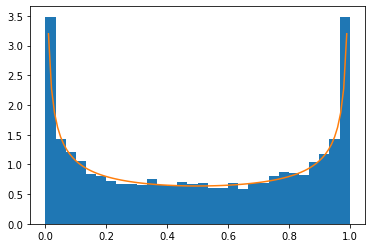

In [2]:
funcion= lambda x: 1/((np.sqrt(1-x))*np.sqrt(x)*np.pi)
funcion_inversa= lambda u: (np.sin(u*np.pi/2))**2
n= 10000

def comparacion_aleatorios(funcion, funcion_inversa, n):
    '''Funcion que compara la funcion de densidad de probabilidad 
    con variables alearorias que distribuyen igual que f(x)'''
    #N:cantidad de terminos f:funcion de densidad de probabilidad Finv: x  despejada 
    u=np.random.uniform(0,1,n)
    f_rand=funcion_inversa(u)
    x=np.arange(0,1,.01)
    funcion_densidad=funcion(x)
    plt.hist(f_rand,density=True, bins=30)
    plt.plot(x,funcion_densidad)
    plt.show()
    
comparacion_aleatorios(funcion,funcion_inversa,n)

### Respuesta Aranzazú

#### Obtener la función inversa 
> 1. Igualar $F(x)=U$
>$$\frac{2}{\pi}\sin^{-1}(\sqrt x) = U,\quad 0\leq x\leq 1$$ </font>

> 2. Despejar $x = F^{-1}(U)$
>$$x =sin^{2}{\frac{U\pi}{2}}$$ </font>

#### Para comparar
> 1. Deriva para obtener la función de distribución $f(x)=\frac{dF(x)}{dx}$
>$$\frac{d}{dx}=\frac{1}{\pi\sqrt{1-x}\sqrt{x}}$$ 

In [3]:
def Dist_1(N: 'Cantidad de datos que generar'):
    '''Con esta función puedo generar variables aleatorias que distribuyen como f(x)'''
    U = np.random.rand(N)
    y = (np.sin((U*np.pi)/2))**2 #La función inversa que obtuve
    return y 

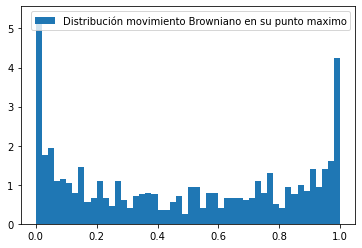

In [4]:
N = 1000
y = Dist_1(N) 

plt.hist(y, bins = 50, density = True, label = 'Distribución movimiento Browniano en su punto maximo')
plt.legend()
plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


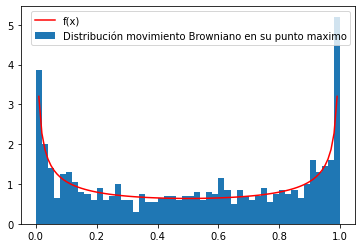

In [5]:
# Comparar 
x = np.arange(0,1,0.01)
y2 = 1/(np.pi*np.sqrt(1-x)*np.sqrt(x))
plt.plot(x,y2,'r', label = 'f(x)')

N = 1000
y = Dist_1(N) 
plt.hist(y, bins = 50, density = True, label = 'Distribución movimiento Browniano en su punto maximo')
plt.legend()
plt.show() 

> 2. Generación variable aleatoria Discreta
> La distribución binomial modela el número de éxitos de n ensayos independientes donde hay una probabilidad p de éxito en cada ensayo.
> Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que $$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
> Por propiedades de la operación factorial la anterior $p_i$ se puede escribir como:
> $$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $$

### Respuesta Antonio

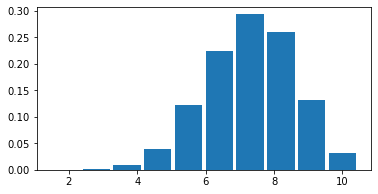

In [6]:
def distribucion_discreta(u1:'vector de números aleatorios', probabilidad_acumulada: 'probabilidad acumulada'):
    vector = np.array(list(map(lambda j:sum(1 for i in probabilidad_acumulada if i<u1[j]),range(N))))
    return vector
def histograma_discreto(distribucion:'señal de varibles aleatorias de un distribución DISCRETA dada'):
    plt.figure(figsize=[6,3])
    y,x = np.histogram(distribucion,bins = len(set(distribucion)),density = True) 
    plt.bar(x[1:],y)
    plt.show()
    
def proba_binomial(n1,p1):
    probabilidad1 = np.zeros(n1) 
    probabilidad1[0] = (1-p1)**n1 
    def probabilidad2(i):
        nonlocal probabilidad1
        c  = p1/(1-p1)
        probabilidad1[i+1]=(c*(n1-i)/(i+1))*probabilidad1[i]       
    [probabilidad2(i) for i in range(n1-1)]
    return np.cumsum(probabilidad1)
n1 = 10; p1 = 0.7; N = 10**4

probabilidad_acumulada = proba_binomial(n1,p1)
u1 = np.random.rand(N)

# Usando el método de la transformada inversa
d_binomial = distribucion_discreta(u1,probabilidad_acumulada)
histograma_discreto(d_binomial)

### Respuesta Aranzazú

In [11]:
# Función que calcula la probabilidad acumulada 
def Dist_Binomial_acum(n:'Parámetro n',
                  p: 'Parámetro p'):
    ''' Esta función calcula la probabilidad acumulada'''
    vec_prob = np.zeros(n) # vector de ceros
    vec_prob[0] = (1-p)**n #valor inicial del vector
    def llenar_vec_prob(i):
        nonlocal vec_prob #se encarga de llenar el vector
        c  = p/(1-p)
        vec_prob[i+1]=(c*(n-i)/(i+1))*vec_prob[i]
        
    # Lleno el vector Pr usando compresión de listas
    [llenar_vec_prob(i) for i in range(n-1)] #la llamo iterativamente
    return np.cumsum(vec_prob) #retorno la probabilidad acumulada

In [12]:
def Gen_distr_discreta(p_acum: 'P.Acumulada de la distribución a generar',
                       indices: 'valores reales a generar aleatoriamente',
                       N: 'cantidad de números aleatorios a generar'):
    
    U = np.random.rand(N)
    # Diccionario de valores aleatorios
    rand2reales = {i: idx for i, idx in enumerate(indices)}

    # Series de los valores aletorios
    y = pd.Series([sum([1 for p in p_acum if p < ui]) for ui in U]).map(rand2reales)

    return y

def plot_histogram_discrete(distribucion:'señal de varibles aleatorias de un distribución DISCRETA dada',
                            label:'label del legend a aparecer en el gráfica',
                            densidad:'por defecto regresa el histograma en densidad'=True):
    # len(set(distribucion)) cuenta la cantidad de elementos distintos de la variable 'distribucion'
    plt.figure(figsize=[10,4])
    y, x = np.histogram(distribucion, bins=len(set(distribucion)), density=densidad) #len(set(distribucion)) me dice cuantos valores diferentes hay en distribución ( con lo que hare el numero de barritas)
    plt.bar(x[1:], y, label=label)
    plt.legend()
    plt.show()

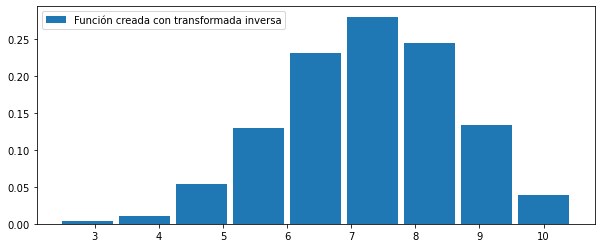

In [13]:
# def D_binomial_intermedia(n,p,N):
n = 10; p = 0.7; N = 1000

p_acum = Dist_Binomial_acum(n,p)

# Usando el método de la transformada inversa
d_binomial = Gen_distr_discreta(p_acum, np.arange(0, n+1), N) #np.arange(entre 0 y n+1)
plot_histogram_discrete(d_binomial, 'Función creada con transformada inversa')

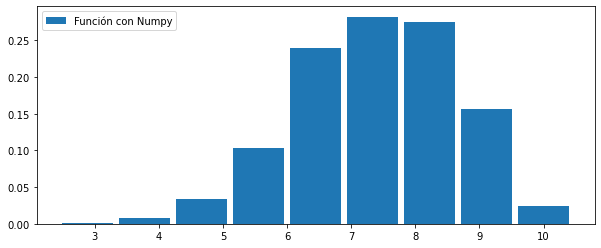

In [14]:
# Comparar Usando numpy
d_bino_numpy = np.random.binomial(n,p,N)
plot_histogram_discrete(d_bino_numpy, 'Función con Numpy')

> ## <font color ='red'>Tarea 6: Demostrar la validez de la siguiente ecuación
>$$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i \longrightarrow \text{Hablar de las ventajas que sea recursiva}$$
    
Recordar que:
>$$p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
   
El factorial nos permite utilizar sus propiedades
    * da lo mismo la primera y la segunda

### Respuesta Antonio

Paso 1: $$Px= \frac{n!}{x!(n-x)!}p^{x}(1-p)^{n-x}$$

Paso 2: = $$P_{x+1}= \frac{n!}{(x+1)!(n-x-1)!}P^{x+1}(1-P)^{n-x-1}$$

Paso 3: $$\frac{P_{x+1}}{P_{x}}= \frac{\frac{n!}{x!(n-x-1)!}p^{x+1}(1-p)^{n-x-1}}{\frac{n!}{(x+1)!(n-x-1)!}P^{x+1}(1-P)^{n-x}}
$$

Paso 4: $$\frac{P_{x+1}}{P_{x}} = \frac{n!}{(x+1)!(n-x-1)!}\frac{p^{x+1}(1-p)^{n-x-1}}{P^{x}(1-P)^{n-x}}\frac{x!(n-x)!}{n!}$$

Paso 5: $$\frac{P_{x+1}}{P_{x}} = \frac{n-x}{x+1}\frac{p}{1-p}$$

Paso 6: $$P_{x+1}= \frac{n-x}{x+1}\frac{p}{1-p}P_{x}$$

Paso 7:  $$P_{i+1}= \frac{n-i}{x+1}\frac{p}{1-p}P_{i}$$

### Respuesta Aranzazú

* Propiedades de los factoriales
$$\frac{1}{(n+1)}=\frac{n!}{(n+1)!}$$

Queremos comprobar que   $p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i$.  
Ya sabemos lo que vale $p_i$ y $p_{i-1}$: 
$$\frac{p_{i+1}}{p_i}=\frac{\frac{n!}{(i+1)!(n-(i+1))!}p^{i+1}(1-p)^{n-(i+1)}}{\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i}}$$

Con división de fracciones:

$$\frac{p_{i+1}}{p_i}=\frac{n!p^{i+1}(1-p)^{n-i-1}i!(n-i)!}{n!p^i(1-p)^{n-i}(i+1)!(n-i-1)!}$$

$$=\frac{p^{i+1-i}(1-p)^{n-i-1-n+i}i!(n-i)!}{(i+1)!(n-i-1)!}=\frac{p(1-p)^{-1}i!(n-i)!}{(i+1)!(n-i-1)!}$$

Con la propiedad de los factoriales (con $n = i, n = (n-i)$):
$$\frac{p(1-p)^{-1}(n-i)}{(i+1)}$$

Y por último:
$$\frac{p(n-i)}{(i+1)(1-p)}$$

Por lo tanto:
$$\frac{p_{i+1}}{p_i} = \frac{p(n-i)}{(i+1)(1-p)}$$

$$p_{i+1} = \frac{p(n-i)}{(i+1)(1-p)}p_i$$

Lo que demuestra la validez de la ecuación planteada.

El que esta ecuación sea recursiva, nos ayuda a que el costo computacional de su solución sea menor, esto debido a que no es necesario hacer los cálculos de los factoriales, los cuales ya sabemos que se componen de muchas operaciones iterativas.

> ## <font color ='red'>Tarea 6
Seguir un procedimiento similar al mostrado cuando se generó una distribución binomial, pero en esta caso genere un código que genere variables aletorias Poisson cuya función de distribución de probabilidad esta dada por:
>$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
    
> Demuestre matemáticamente que 
> $$P(k+1)=\frac{\lambda}{k+1}P(k)$$
> y a partir de esta relación genere variables aletorias que distribuyen poisson usando el método de la transformada inversa.

Enlace: https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Poisson
    
$
\begin{aligned}
\frac{p_{k+1}}{p_k}& = \frac{e^{-\lambda}(\lambda)^k}{k!}
\end{aligned}
$

### Respuesta Antonio

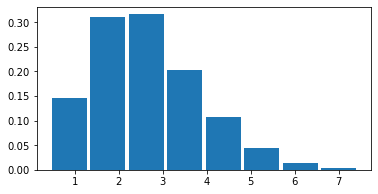

In [15]:
# Función que calcula la probabilidad acumulada optimizada
def probabilidad_poisson(n2,lamba):
    proba_poisson = np.zeros(n2) 
    proba_poisson[0] = np.exp(-lamba) 
    def pois(i2):
        nonlocal proba_poisson
        proba_poisson[i2+1]=(lamba/(i2+1))*proba_poisson[i2]
    [pois(i2) for i2 in range(n2-1)]
    return np.cumsum(proba_poisson)

n2 = 10; lamba = 2; N2 = 10**4

poisson_acumulado= probabilidad_poisson(n2,lamba)
u2 = np.random.rand(N2)

# Usando el método de la transformada inversa
d_binomial2 = distribucion_discreta(u2,poisson_acumulado)
histograma_discreto(d_binomial2)

### Respuesta Aranzazú

In [32]:
def acum_Poisson(n:'cantidad de variables generdas',
                 l:'valor de lambda'):
    '''Este código genera variables aletorias Poisson con la función de distribución de 
    probabilidad dada'''
    v_poisson = np.zeros(n)
    v_poisson[0] = np.exp(-l) #valor inicial del vector
    def llena_poisson(i):
        nonlocal v_poisson 
        v_poisson[i+1]=((l*v_poisson[i])/(i+1))
        
    # Lleno el vector Pr usando compresión de listas
    [llena_poisson(i) for i in range (n-1)] #la llamo iterativamente
    return np.cumsum(v_poisson) #retorno la probabilidad acumulada

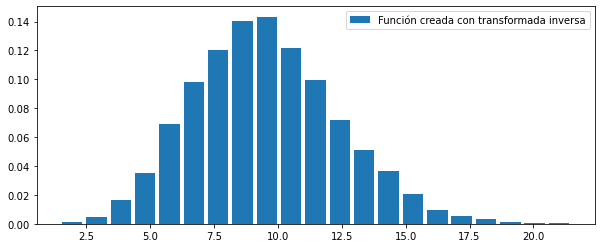

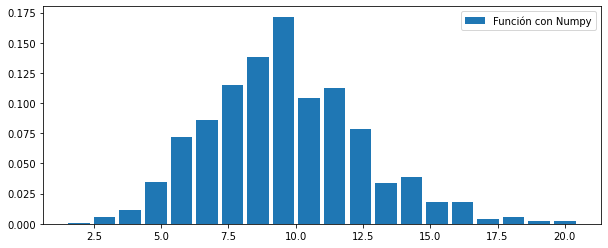

In [33]:
#Parámetros
n = 1000; l = 9; N = 10000
poisson_acum = acum_Poisson(n,l)
# Usando el método de la transformada inversa
d_poisson = Gen_distr_discreta(poisson_acum, np.arange(0, n+1), N)
plot_histogram_discrete(d_poisson, 'Función creada con transformada inversa')
# Comparar Usando numpy
d_poisson_numpy = np.random.poisson(l,n)
plot_histogram_discrete(d_poisson_numpy, 'Función con Numpy')

Demuestre matemáticamente que:
$$P(k+1)=\frac{\lambda}{k+1}P(k)$$

Conocemos que $\frac{1}{k+1} = \frac{k!}{(k+1)!}$:

$$\frac{p_{k+1}}{p_k} = \frac{\frac{e^{-\lambda}(\lambda)^{k+1}}{(k+1)!}}{\frac{e^{-\lambda}(\lambda)^k}{k!}}$$

Por división de fracciones:
$$\frac{p_{k+1}}{p_k} = \frac{e^{-\lambda}(\lambda)^{k+1}k!}{e^{-\lambda}(\lambda)^k(k+1)!}=\frac{(\lambda)^{k+1}k!}{(\lambda)^k(k+1)!}=\frac{(\lambda)^{k+1-k}k!}{(k+1)!}=\frac{(\lambda)k!}{(k+1)!}$$

Utilizando la propiedad que conocemos:
$$\frac{(\lambda)k!}{(k+1)!}=\frac{\lambda}{(k+1)}$$

Por lo tanto obtenemos:
$$\frac{p_{k+1}}{p_k} = \frac{\lambda}{(k+1)}$$

Despejando:
$$p_{k+1} = \frac{\lambda}{(k+1)}p_k$$

Por lo tanto, esta relación queda matemáticamente comprobada.

# Tarea 6
Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:
1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.
2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).
3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 
4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. El resultado debe ser como sigue:
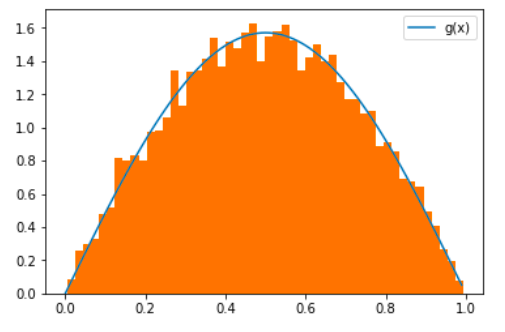

5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados. El resultado debe de ser como sigue:
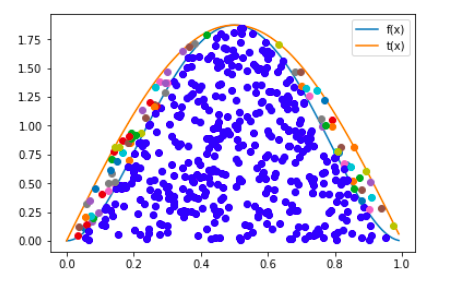

6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir

7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

### Respuesta Antonio

El máximo de f es: [1.875]


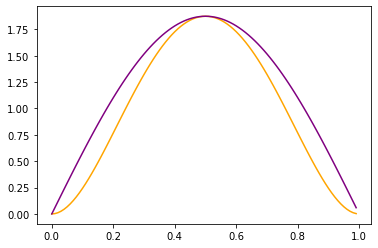

In [16]:
#Inciso 1
f = lambda x:30*(x**2-2*x**3+x**4)
x = np.arange(0,1,0.01)  
t = lambda a,x: a*np.sin(np.pi*x) 
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
print('El máximo de f es:',max_f)
plt.plot(x,f(x), label='f(x)', color="orange")
plt.plot(x,t(np.amax(f(x)),x), label='t(x)', color="purple")

**Inciso 2:**

Paso 1: $$t(x) = a\sin (\pi x)$$

Paso 2: $$g(x)= \frac{t(x)}{c}$$

Paso 3: $$c = \int_{0}^{1}t(x)d(x)$$

Paso 4: $$\int_{0}^{1}t(x)d(x) = a\sin (\pi x) d(x)$$

paso 5: $$\int_{0}^{1}a\sin (\pi  x)= \frac{2a}{\pi }$$

Paso 6: $$g(x)= \frac{a\sin (\pi x)}{\frac{2a}{\pi }}$$

Paso 7: $$g(x) = \frac{\pi a\sin (\pi x)}{2a}$$

Paso 8 $$g(x) = \frac{\pi \sin (\pi x)}{2}$$

Paso 9: $$g(x)= 0.5\pi \sin (\pi x)$$


**Inciso 3**

sabemos que ... $$g(x) = \frac{\pi \sin (\pi x)}{2}$$

Paso 1: $$G(x)= \int_{-\infty}^{\infty} g(x)d(x)$$

Paso 2: $$G(x)= \int_{0}^{x} g(x)d(x)$$

Paso 3: $$G(x) = \frac{-\cos (\pi x)}{2}=U$$

Paso 4: $$2U = -\cos (\pi x)$$

Paso 5:  $$-2U = \cos (\pi x)$$

Paso 6: $$\pi x = \arccos (-2U)$$

Paso 7: $$x = \frac{\arccos (-2U)}{\pi }$$


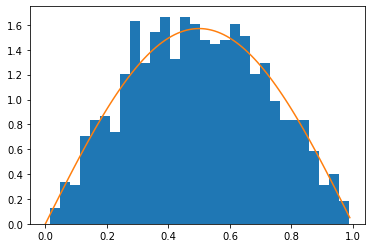

In [17]:
#Inciso 4
funcion_densidad2= lambda x: (np.pi/2)*np.sin(np.pi*x)
generador_numeros_aleatorios= lambda u: (1/np.pi)*np.arccos(-2*u+1)
N3=1000
inciso4=comparacion_aleatorios(funcion_densidad2,generador_numeros_aleatorios,N3)
inciso4

In [18]:
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1)
    x=np.arange(0,1,.01)
    a = float(f(optimize.fmin(lambda x:-f(x),0,disp=False)))#asi encontramos el valor maximo de f
    t_x = t(a,R1)#Creamos el arreglo con distribucion t
    condition = R2*t_x <=f_x #Comparamos
    j=0
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]
    for i in range(len(R1)):
        if condition[i]:
            j+=1
    plt.show()
    return j/len(R1)

El máximo de f es: [1.875]


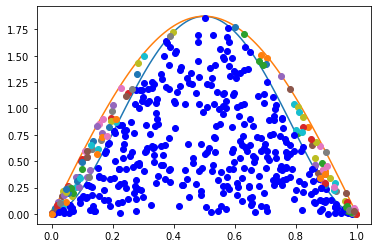

In [19]:
# Ilustración del método de aceptación y rechazo cuando se toma t(x) constante

# Función objetivo 
f = lambda x:30*(x**2-2*x**3+x**4)
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t -> Función constante
t = lambda a,x: a*np.sin(np.pi*x) #Funcion "pivote" # función constante

x = np.arange(0,1,0.01)  # Rango donde se graficará las funciones
print('El máximo de f es:',max_f)



# Validación del método
n=500 #numero de puntos a crear
#Creando nuestros Rs
# Como estoy tomando t(x) constante solo es necesario generar valores aleatorios 
# basados en el dominio de la función f(x), en este caso el dominio es [0,1],
# entonces yo debo de generar variables aleatorias uniformes entre U~(0,1)
R1=np.random.rand(n) 
R2=np.random.rand(n)
# Gráficas de las funciones
plt.plot(x,f(x), label='f(x)')#Graficando la grafica f
plt.plot(x,t(np.amax(f(x)),x), label='t(x)') #Graficando la grafica t
aleatorias =Acep_rechazo(R2,R1,f,t)#mandamos llamar la funcion para generar puntos

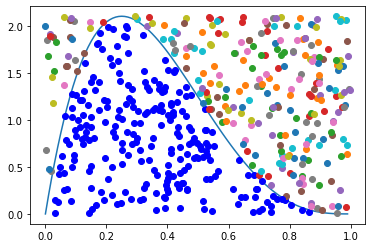

In [20]:
n6=500
funcion_densidad6=lambda x: 20*x*(1-x)**3 
x=np.arange(0,1,.01) 
maximizacion_densidad = optimize.fmin(lambda x: -funcion_densidad6(x), 0,disp=False) 
maximizacion_funcion=funcion_densidad6(maximizacion_densidad) 
R1=np.random.rand(n6) 
R2=np.random.rand(n6)
t=lambda x: maximizacion_funcion*np.ones(len(x))
def Acep_rechazo2(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]
    numeros_aceptados=[R2[i]*t_x[i] for i in range(len(R1)) if condition[i]] 
    return numeros_aceptados
                
    plt.show()
plt.plot(x,funcion_densidad6(x)) 
t=Acep_rechazo2(R2,R1,funcion_densidad6,t)


### Respuesta Aranzazú

#### 1. Graficás f y t

El máximo de f es: [1.875]


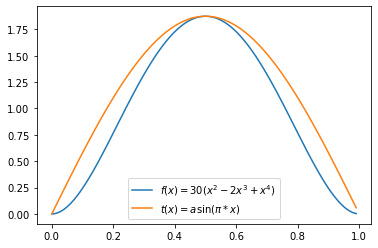

In [21]:
# Función objetivo 
f = lambda x: 30*(x**2 - 2*x**3 + x**4)
a = f(optimize.fmin(lambda x:-f(x), 0, disp=False)) #maximo de la función f
# Función t 
t = lambda x: a*np.sin(np.pi*x) #función t

# Rango donde se graficará las funciones (entre 0 y 1, con pasos de 0.1)
x = np.arange(0, 1, 0.01)
print('El máximo de f es:',a)

# Gráficas de las funciones
plt.plot(x,f(x),label='$f(x) = 30(x^{2}-2x^{3}+x^{4})$')
plt.plot(x,t(x),label='$t(x) = a\sin(\pi*x)$')
plt.legend()

Podemos ver en la gráfica que efectivamente $t(x)\geq f(x)$.

#### 2. Encontrar la función de densidad  g(x)

Sabemos que $g(x)=\frac{t(x)}{c}$.   
Sabemos que es una función de densidad por que su función acumulada $G(x) = 1 $.  
Y anteriormente asumimos que $c = \int_{0}^{1} t(x) dx$.  
Por lo tanto para este caso en donde $t(x) = a \sin(\pi x)$:   
$$c = \int_{0}^{1}a \sin(\pi x)$$
Resolvemos:
$$\int_{0}^{1}a \sin(\pi x) = -\frac{a\cos(\pi x)}{\pi}$$
Evaluando:
$$-\frac{a\cos(\pi 1)}{\pi}-(-\frac{a\cos(\pi 0)}{\pi}) = \frac{a}{\pi}+\frac{a}{\pi}$$
Por lo tanto:
$$c = \frac{2a}{\pi}$$
Ahora vemos que:
$$g(x) = \frac{a\sin(\pi x)}{\frac{2a}{\pi}}$$
Y obtenemos:
$$g(x) = \frac{\pi\sin(\pi x)}{2}$$

#### 3. Transformada Inversa 

Para sacar la transformada inversa necesitamos la función de probabilidad acumulada que obtenemos $G(x) = \int_{-\infty}^{\infty}g(x)dx$.
Acotamos la integral de 0 a :  $G(x) = \int_{0}^{x}g(x)dx$.

Por lo tanto tenemos:
$$G(x) = \int_{0}^{x}\frac{\pi\sin(\pi x)}{2}dx$$

Usando el mêtodo de sustitución: $u = \pi x, \frac{du}{dx}=\pi, dx = \frac{1}{\pi}du$

$$\frac{1}{2} \int_{0}^{x} \sin(u)du = -\frac{\cos(u)}{2}$$

Sustituyendo a la variable original y evaluando:

$$-\frac{\cos(\pi x)}{2} = -\frac{\cos(\pi x)}{2} - (-\frac{\cos(\pi 0)}{2})$$

Obtenemos:
$$G(x) = -\frac{\cos(\pi x)- 1}{2} $$

Para calcular su función inversa (para obtener la función que distribuye como $g(x)$):
> 1. Igualar $G(x)=U$
>$$-\frac{\cos(\pi x)- 1}{2} = U$$ 

> 2. Despejar $x = G^{-1}(U)$
>$$\cos(\pi x)=1-2U$$ 
Aplicamos identidades trigonométricas inversas
>$$\pi x = \arccos(1-2U)$$
Y por último:
>$$ x = \frac{\arccos(1-2U)}{\pi}$$

#### 4. Generar 10000 puntos aleatorios con el método de la transformada inversa, que sigan la distribución  $g(x)$ 

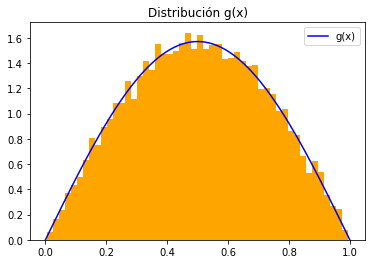

In [22]:
def Dist_2(N: 'Cantidad de datos que generar'):
    '''Con esta función puedo generar variables aleatorias que distribuyen como g(x)'''
    U = np.random.rand(N)
    y = (np.arccos(1-2*U))/np.pi #La función inversa que obtuve
    return y 

# Comparar 
x = np.arange(0,1,0.0001)
y2 = (np.pi*np.sin(np.pi*x))/2 #función g(x)
plt.plot(x,y2,'b', label = 'g(x)')

N = 10000
y = Dist_2(N) 

plt.hist(y, bins = 50, density = True, color = 'orange')
plt.title('Distribución g(x)')
plt.legend()
plt.show()

#### 5. Generar 500 puntos con el método de aceptación y rechazo 

In [23]:
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
    R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]
                
    plt.show() #devuelve la grafica
    
    x = [R1[i] for i in range(len(R1)) if condition[i]] 
    return x  #devuelve los valores que acepto

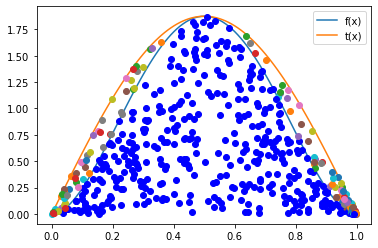

In [27]:
x = np.arange(0, 1, 0.01) # Rango donde se graficará las funciones (entre 0 y 1, con pasos de 0.1)

# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

# Validación del método
N = 500 # número de puntos a simular

R2 = np.random.rand(N)
R1 = np.random.uniform(0, 1, size = N) #entre el dominio (en este caso 0 y 1)

x_r = Acep_rechazo(R2, R1, f, t)

#### 6. Comparar el porcentaje de puntos de aceptación cuando se usa  $t(x)$ constante y $t(x)$ senoidal.

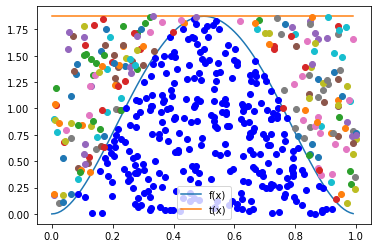

In [28]:
# Generar los puntos con t(x) constante
# Función t -> Función constante
t_c = lambda x: a * np.ones([len(x)])

x = np.arange(0, 1, 0.01) # Rango donde se graficará las funciones (entre 0 y 1, con pasos de 0.1)

# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t_c(x),label='t(x)')
plt.legend()

# Validación del método
N = 500 # número de puntos a simular

R2 = np.random.rand(N)
R1 = np.random.uniform(0, 1, size = N) #entre el dominio (en este caso 0 y 1)

x_r_c = Acep_rechazo(R2, R1, f, t_c)

In [29]:
# Cantidad de puntos aceptados con t(x) senoidal
len(x_r)

378

In [30]:
# Cantidad de puntos aceptados con t(x) constante
len(x_r_c)

284

Podemos ver que se aceptaron más puntos con la función senoidal, debido a como se generan los puntos en esta dominio mas reducido.  
Podemos ver que, aunque es mas sencillo y práctico definir una t(x) constante, pues basta con encontrar el punto máximo de la función objetivo, resulta mejor utilizar una función que acote de mejor manera nuestra f(x), pues nos dará una mayor cantidad de puntos aceptados.

#### 7. Nueva variable aleatoria $f(x) = 20x(1-x)^{3}$

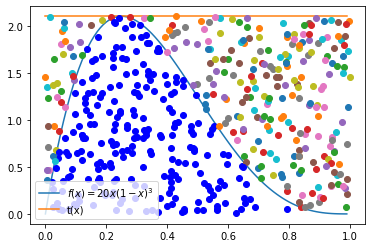

In [31]:
# Función objetivo 
f = lambda x: 20*x*(1-x)**3
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x), 0, disp=False)) #con optimize encuentro los puntos criticos *no hay funcion maximo, asu qie le pongo -f(x) (lo necesito para g(x)). disp=False: que no me muestre 
# Función t -> Función constante
t = lambda x: max_f * np.ones([len(x)]) #generar un numero depende del vector que yo le meta

x = np.arange(0, 1, 0.01) # Rango donde se graficará las funciones (entre 0 y 1, con pasos de 0.1)

# Gráficas de las funciones
plt.plot(x,f(x),label='$f(x) = 20x(1-x)^{3}$')
plt.plot(x,t(x),label='t(x)')
plt.legend()

# Validación del método
N = 500 # número de puntos a simular

R2 = np.random.rand(N)
R1 = np.random.uniform(0, 1, size = N) 

x_r_7 = Acep_rechazo(R2, R1, f, t)